In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### See Data

In [54]:
data = pd.read_csv("../Data/preparedData.csv")
data.head()

,zcr,spec_cnt,spec_bw,roll_off,names,mfcc_9,mfcc_8,mfcc_7,mfcc_6,mfcc_5,...,mfcc_15,mfcc_14,mfcc_13,mfcc_12,mfcc_11,mfcc_10,mfcc_1,mfcc_0,labels,chroma
0,0.101915,2682.727340,2924.215041,5957.305644,pop.00027.wav,3.363038,5.728664,-0.398120,5.277308,7.404654,...,-3.783234,-1.270527,-5.902046,-1.841913,-4.229316,-2.523778,83.335220,-75.340881,pop,0.377454
1,0.137063,2835.031945,2731.743815,5944.989051,pop.00033.wav,2.875912,2.522769,-0.084578,3.164009,12.719352,...,-0.411383,0.936584,1.085335,1.609468,-3.026064,-1.671819,73.770790,-68.972328,pop,0.422917
2,0.228737,4225.662023,3404.260172,8483.157037,pop.00032.wav,0.291262,3.456910,0.084071,3.028750,0.607630,...,-1.407112,0.222327,-0.767989,2.896105,1.256652,0.616375,41.587727,-113.141205,pop,0.426655
3,0.103542,2525.971548,2848.668079,5554.558079,pop.00026.wav,4.925743,0.998751,-5.546153,0.749484,4.876618,...,-2.382944,-0.159194,-3.043840,-0.026356,-4.917739,-5.829502,97.464462,-73.339767,pop,0.334941
4,0.148740,3070.583251,2975.861836,6652.934771,pop.00030.wav,-0.179873,0.647843,-0.342443,-1.322754,-0.917457,...,-3.441155,1.754881,1.247870,2.520512,-1.056774,-1.216198,72.297020,-18.141941,pop,0.357725


#### Shuffle Data

In [55]:
data = data.sample(frac=1)
data.head()

,zcr,spec_cnt,spec_bw,roll_off,names,mfcc_9,mfcc_8,mfcc_7,mfcc_6,mfcc_5,...,mfcc_15,mfcc_14,mfcc_13,mfcc_12,mfcc_11,mfcc_10,mfcc_1,mfcc_0,labels,chroma
852,0.035481,1495.431718,2331.783937,3052.531542,country.00023.wav,-1.900697,-2.983953,3.887332,-1.762345,5.928615,...,-6.012602,-3.750993,-4.243259,-6.479884,-0.965016,-2.868023,110.660469,-353.229065,country,0.305422
616,0.090195,1995.882452,2097.045347,4227.074439,rock.00000.wav,12.694859,-13.523647,15.127455,-15.394263,23.154758,...,2.012123,-6.195775,2.189880,-11.579920,8.506660,-10.881980,109.269157,-116.608017,rock,0.387525
667,0.132433,2632.695048,2550.454193,5310.709554,rock.00054.wav,-8.927162,-6.168184,-3.755710,-4.129112,6.022743,...,-7.082283,-4.687138,-5.409220,-4.643326,-2.213438,-4.096210,75.611328,-156.208466,rock,0.346682
420,0.186434,3002.851704,2214.524618,5293.851322,reggae.00079.wav,4.572786,8.495010,4.253568,2.536451,25.286221,...,-7.498869,-2.867772,3.620647,2.829551,2.577846,2.827187,57.025555,-155.655319,reggae,0.476249
263,0.159577,3391.852766,3108.955075,7204.406436,disco.00013.wav,3.353203,1.882853,3.092975,-2.477130,2.574106,...,-7.846543,-3.672303,-5.071636,-2.455497,-1.519620,0.003278,56.207020,-40.043388,disco,0.421091


In [56]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y = data["labels"]
y_encoded = encoder.fit_transform(y)
data["enc_labels"] = y_encoded
data = data.drop("labels", axis = 1)
data = data.drop("names", axis = 1)
data.head()

,zcr,spec_cnt,spec_bw,roll_off,mfcc_9,mfcc_8,mfcc_7,mfcc_6,mfcc_5,mfcc_4,...,mfcc_15,mfcc_14,mfcc_13,mfcc_12,mfcc_11,mfcc_10,mfcc_1,mfcc_0,chroma,enc_labels
852,0.035481,1495.431718,2331.783937,3052.531542,-1.900697,-2.983953,3.887332,-1.762345,5.928615,18.770220,...,-6.012602,-3.750993,-4.243259,-6.479884,-0.965016,-2.868023,110.660469,-353.229065,0.305422,2
616,0.090195,1995.882452,2097.045347,4227.074439,12.694859,-13.523647,15.127455,-15.394263,23.154758,-11.890024,...,2.012123,-6.195775,2.189880,-11.579920,8.506660,-10.881980,109.269157,-116.608017,0.387525,9
667,0.132433,2632.695048,2550.454193,5310.709554,-8.927162,-6.168184,-3.755710,-4.129112,6.022743,5.822456,...,-7.082283,-4.687138,-5.409220,-4.643326,-2.213438,-4.096210,75.611328,-156.208466,0.346682,9
420,0.186434,3002.851704,2214.524618,5293.851322,4.572786,8.495010,4.253568,2.536451,25.286221,-14.192080,...,-7.498869,-2.867772,3.620647,2.829551,2.577846,2.827187,57.025555,-155.655319,0.476249,8
263,0.159577,3391.852766,3108.955075,7204.406436,3.353203,1.882853,3.092975,-2.477130,2.574106,2.449712,...,-7.846543,-3.672303,-5.071636,-2.455497,-1.519620,0.003278,56.207020,-40.043388,0.421091,3


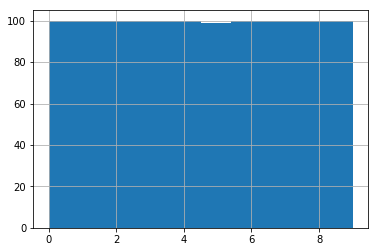

In [57]:
data["enc_labels"].hist(bins=10)

## Split Testing and Training Data

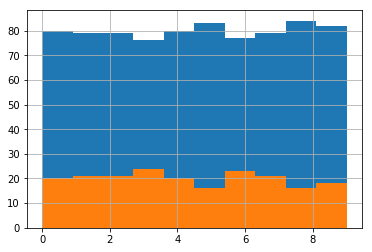

In [58]:
from sklearn.model_selection import train_test_split

Y = data["enc_labels"]
X = data.drop("enc_labels", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

y_train.hist(bins=10) 
y_test.hist(bins=10)


### Training and Testing Model-1 (KNN):

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

best_score, best_train_score, t_score, best_k = 0.0, 0, 0.0, 0
best_knn_model = None

for k in range(2, 100, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    t_score = knn.score(X_train, y_train)
    if t_score > best_train_score:
        best_train_score = t_score
    
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        best_knn_model = knn

knn = best_knn_model        
m1_tr_score, m1_test_score = best_train_score, best_score

print("Best Value for k: {}".format(best_k))
print("Best Training Score: {}, Test Score: {}".format(best_train_score, best_score))

Best Value for k: 11
Best Training Score: 0.6795994993742178, Test Score: 0.395


### Training and Testing Model-2 (SVM):

In [60]:
from sklearn import svm

svm = svm.SVC(decision_function_shape='ovm')
svm.fit(X_train, y_train)

m2_tr_score, m2_test_score = svm.score(X_train, y_train), svm.score(X_test, y_test)
m2_tr_score, m2_test_score

(1.0, 0.115)

### Training and Testing Model-3 (Random Forest):

In [61]:
from sklearn.ensemble import RandomForestClassifier

best_score, best_train_score, t_score, n_est = 0.0, 0, 0.0, 0
best_rf_model = None
for k in range(1, 100, 1):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_train, y_train)
    t_score = rf.score(X_train, y_train)
    if t_score > best_train_score:
        best_train_score = t_score
        
    score = rf.score(X_test, y_test)
    if score > best_score:
        n_est = k
        best_score = score
        best_rf_model = rf

rf = best_rf_model
m3_tr_score, m3_test_score = best_train_score, best_score

print("Best Value for estimators: {}".format(n_est))
print("Best Training Score: {}, Testing Score: {}".format(best_train_score, best_score))

Best Value for estimators: 90
Best Training Score: 1.0, Testing Score: 0.67


### Compare Performances and finalize the best model to proceed

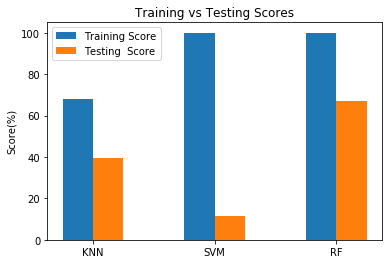

In [62]:
labels = ['KNN', 'SVM', 'RF']
training_result = [x * 100 for x in [m1_tr_score, m2_tr_score, m3_tr_score]]
testing_result = [x * 100 for x in  [m1_test_score, m2_test_score, m3_test_score]]

x = np.arange(len(labels))  
width = 0.25  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_result, width, label='Training Score')
rects2 = ax.bar(x + width/2, testing_result, width, label='Testing  Score')


ax.set(ylabel = 'Score(%)',
       title = 'Training vs Testing Scores',
       xticks = x,
       xticklabels = labels)
ax.legend()
plt.show();

### Save Model, Encoded Labels and Data

In [63]:
import pickle
pickle.dump(rf, open("../Saved_Models/model.obj", "wb"))
pickle.dump(encoder, open("../Saved_Models/encoder.obj", "wb"))
pickle.dump(X, open("../Saved_Models/data.obj", "wb"))
pickle.dump(y_encoded, open("../Saved_Models/labels.obj", "wb"))
pickle.dump(rf.predict(X_test), open("../Saved_Models/y_pred", "wb"))
pickle.dump(X_test, open("../Saved_Models/X_test", "wb"))
pickle.dump(y_test, open("../Saved_Models/y_actual", "wb"))
